In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pride_df = pd.read_csv('pride_index.csv')
pride_df

,campus_name,campus_location,rating,students,community_type
0,"University of Maryland, College Park","College Park, MD",5.0,37952,large urban city
1,University of Michigan-Dearborn,"Dearborn, MI",3.0,9000,medium city
2,SUNY Westchester Community College,"Valhalla, NY",4.0,13000,very small town
3,University at Buffalo,"Buffalo, NY",3.5,29850,medium city
4,Slippery Rock University,"Slippery Rock, PA",4.0,8500,rural community
...,...,...,...,...,...
233,University of Texas Arlington,"Arlington, TX",5.0,47000,medium city
234,University of Arkansas at Little Rock,"Little Rock, AR",2.5,6712,medium city
235,Linfield University,"McMinnville, OR",3.0,1750,small city
236,Bluegrass Community & Technical College (BCTC),"Lexington, KY",4.0,14500,medium city


In [13]:
pride_df.dropna()

,campus_name,campus_location,rating,students,community_type
0,"University of Maryland, College Park","College Park, MD",5.0,37952,large urban city
1,University of Michigan-Dearborn,"Dearborn, MI",3.0,9000,medium city
2,SUNY Westchester Community College,"Valhalla, NY",4.0,13000,very small town
3,University at Buffalo,"Buffalo, NY",3.5,29850,medium city
4,Slippery Rock University,"Slippery Rock, PA",4.0,8500,rural community
...,...,...,...,...,...
233,University of Texas Arlington,"Arlington, TX",5.0,47000,medium city
234,University of Arkansas at Little Rock,"Little Rock, AR",2.5,6712,medium city
235,Linfield University,"McMinnville, OR",3.0,1750,small city
236,Bluegrass Community & Technical College (BCTC),"Lexington, KY",4.0,14500,medium city


In [4]:
# What is the distribution of inclusivity ratings among campuses?
pride_df.describe()

,rating,students
count,238.000000,238.000000
mean,3.983193,12102.163866
std,0.816323,11870.241312
min,1.500000,125.000000
25%,3.500000,2397.000000
50%,4.000000,7929.500000
75%,4.500000,16867.750000
max,5.000000,50000.000000


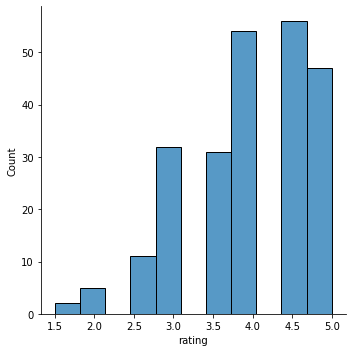

In [6]:
sns.displot(pride_df, x="rating")

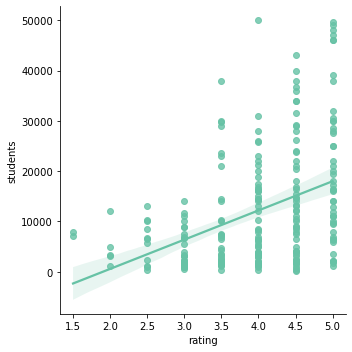

In [73]:
# Is there a correlation between the number of students at a campus and its inclusivity rating? 
# Do larger campuses tend to have higher or lower ratings?

sns.lmplot(x="rating", y="students", data=pride_df)


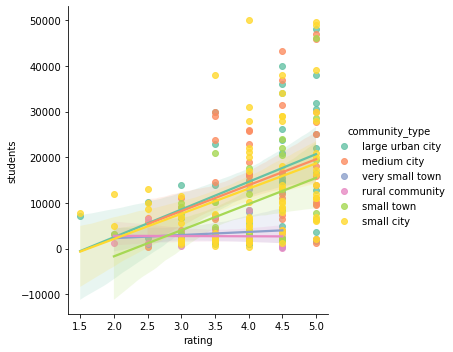

In [74]:
sns.lmplot(x="rating", y="students", data=pride_df, hue='community_type')

In [53]:
#How does the community type affect the inclusivity rating of a campus? 
#Compare the inclusivity ratings across different community types (e.g., large urban city, medium city, very small town, rural community).
# Use appropriate statistical tests and visualizations to support your analysis.

df_mean = pride_df.groupby(['community_type']).mean()
df_mean

,rating,students
community_type,,
large urban city,4.136364,15446.863636
medium city,4.074074,14309.685185
rural community,3.566667,2710.000000
small city,4.013158,13209.960526
small town,3.918919,9280.432432
very small town,3.541667,3328.916667


In [54]:
df_median = pride_df.groupby(['community_type']).median()
df_median

,rating,students
community_type,,
large urban city,4.50,14292.5
medium city,4.00,11057.0
rural community,3.50,1651.0
small city,4.00,8990.0
small town,4.00,5514.0
very small town,3.75,2100.0


<AxesSubplot:xlabel='rating', ylabel='community_type'>

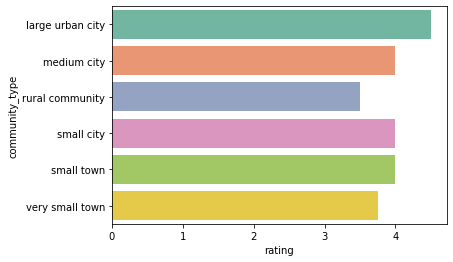

In [70]:
#df_mean.plot.bar(y='rating')
sns.set_palette("Set2")
df_2 = pride_df.groupby('community_type').median()
df_2.reset_index(inplace=True)
sns.barplot(y='community_type', x='rating', data=df_2)

In [48]:
pride_df['community_type'].value_counts()

small city          76
medium city         54
large urban city    44
small town          37
rural community     15
very small town     12
Name: community_type, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='community_type'>

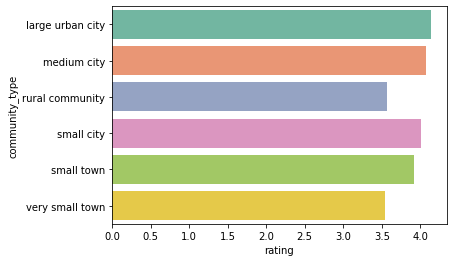

In [71]:
sns.set_palette("Set2")
df_2 = pride_df.groupby('community_type').mean()
df_2.reset_index(inplace=True)
sns.barplot(y='community_type', x='rating', data=df_2)

In [51]:
df.describe()

,rating,students
count,6.000000,6.000000
mean,3.875141,9714.309741
std,0.258897,5589.652462
min,3.541667,2710.000000
25%,3.654730,4816.795608
50%,3.966038,11245.196479
75%,4.058845,14034.754020
max,4.136364,15446.863636


In [75]:
df_2

,community_type,rating,students
0,large urban city,4.136364,15446.863636
1,medium city,4.074074,14309.685185
2,rural community,3.566667,2710.000000
3,small city,4.013158,13209.960526
4,small town,3.918919,9280.432432
5,very small town,3.541667,3328.916667


In [80]:
pride_df.query('community_type == "large urban city"')

,campus_name,campus_location,rating,students,community_type
0,"University of Maryland, College Park","College Park, MD",5.0,37952,large urban city
5,Emory University,"Atlanta, GA",4.5,14769,large urban city
12,"Rutgers, The State University of New Jersey-Ne...","New Brunswick, NJ",5.0,48000,large urban city
16,Augsburg University,"Minneapolis, MN",5.0,3537,large urban city
18,Portland State University,"Portland, OR",5.0,25000,large urban city
21,Northeastern Illinois University,"Chicago, IL",2.5,10275,large urban city
27,University of Nebraska at Omaha,"Omaha, NE",4.5,15500,large urban city
39,"California State University, Northridge","Northridge, CA",4.5,36000,large urban city
46,University of Houston,"Houston, TX",4.5,40000,large urban city
48,College of Staten Island/CUNY,"Staten Island, NY",3.5,10185,large urban city


In [ ]:
pride